In [24]:
# ------------------------------------------------
# 
# sil vs cc data, plot the difference between the 
# two for various initial liming scenarios
# 
# (note, takes
# files that were generated in the scratch/cdr_
# ...feedstock_compare-apprate+psize.ipynb file)
# 
# ------------------------------------------------
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib.colors import TwoSlopeNorm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # for custom legend entries (needed for contour plot)
import cmocean.cm as cmo
import pickle
import os
import re
import glob
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable


# set data path
datpath = "/home/tykukla/aglime-swap-cdr/scepter/process/runs/batch_postprocResults/cc-sil_psize_apprate"

# --- select which data to read in 
# CASE 1 -- lowest counterfactual application
fertLevel_1 = "low"
idx_1 = "002" # [(no tag): 009=0.2 ton cc/ha/yr; 012=0.5 ton cc/ha/yr; 002=0.8 ton cc/ha/yr; 011=1.4 ton cc/ha/yr] 
tag_sil_1 = "basev11a" # "basev3_multiCTRL"

# CASE 2 -- middle (control) counterfactual application
fertLevel_2 = "low"
idx_2 = "001" # [(no tag): 009=0.2 ton cc/ha/yr; 012=0.5 ton cc/ha/yr; 002=0.8 ton cc/ha/yr; 011=1.4 ton cc/ha/yr] 
tag_sil_2 = "basev11a" # "basev3_multiCTRL"

# CASE 3 -- highest counterfactual application
fertLevel_3 = "low"
idx_3 = "006" # [(no tag): 009=0.2 ton cc/ha/yr; 012=0.5 ton cc/ha/yr; 002=0.8 ton cc/ha/yr; 011=1.4 ton cc/ha/yr] 
tag_sil_3 = "basev11a" # "basev3_multiCTRL"

In [25]:
# ---- READ IN DATA
# CASE 1 
datdir_1 = f"meanAnn_shortRun_{fertLevel_1}Fert_{tag_sil_1}_{idx_1}"    
datloc_1 = os.path.join(datpath, datdir_1)
# read in xr datasets
dssil1 = xr.open_dataset(os.path.join(datloc_1, 'ds_sil.nc'))
dscc1 = xr.open_dataset(os.path.join(datloc_1, 'ds_cc.nc'))
ds_anom1 = xr.open_dataset(os.path.join(datloc_1, 'ds_anom.nc'))
# # read in profile data
# dssil1_v1 = xr.open_dataset(os.path.join(datloc_1, f"{varin1}_{dustsp_sil}_{varsuff}.nc"))
# dscc1_v1 = xr.open_dataset(os.path.join(datloc_1, f"{varin1}_{dustsp_cc}_{varsuff}.nc"))
# dssil1_v2 = xr.open_dataset(os.path.join(datloc_1, f"{varin2}_{dustsp_sil}_{varsuff}.nc"))
# dscc1_v2 = xr.open_dataset(os.path.join(datloc_1, f"{varin2}_{dustsp_cc}_{varsuff}.nc"))

# CASE 2
datdir_2 = f"meanAnn_shortRun_{fertLevel_2}Fert_{tag_sil_2}_{idx_2}"    
datloc_2 = os.path.join(datpath, datdir_2)
# read in xr datasets
dssil2 = xr.open_dataset(os.path.join(datloc_2, 'ds_sil.nc'))
dscc2 = xr.open_dataset(os.path.join(datloc_2, 'ds_cc.nc'))
ds_anom2 = xr.open_dataset(os.path.join(datloc_2, 'ds_anom.nc'))
# # read in profile data
# dssil2_v1 = xr.open_dataset(os.path.join(datloc_2, f"{varin1}_{dustsp_sil}_{varsuff}.nc"))
# dscc2_v1 = xr.open_dataset(os.path.join(datloc_2, f"{varin1}_{dustsp_cc}_{varsuff}.nc"))
# dssil2_v2 = xr.open_dataset(os.path.join(datloc_2, f"{varin2}_{dustsp_sil}_{varsuff}.nc"))
# dscc2_v2 = xr.open_dataset(os.path.join(datloc_2, f"{varin2}_{dustsp_cc}_{varsuff}.nc"))

# CASE 3
datdir_3 = f"meanAnn_shortRun_{fertLevel_3}Fert_{tag_sil_3}_{idx_3}"    
datloc_3 = os.path.join(datpath, datdir_3)
# read in xr datasets
dssil3 = xr.open_dataset(os.path.join(datloc_3, 'ds_sil.nc'))
dscc3 = xr.open_dataset(os.path.join(datloc_3, 'ds_cc.nc'))
ds_anom3 = xr.open_dataset(os.path.join(datloc_3, 'ds_anom.nc'))
# # read in profile data
# dssil3_v1 = xr.open_dataset(os.path.join(datloc_3, f"{varin1}_{dustsp_sil}_{varsuff}.nc"))
# dscc3_v1 = xr.open_dataset(os.path.join(datloc_3, f"{varin1}_{dustsp_cc}_{varsuff}.nc"))
# dssil3_v2 = xr.open_dataset(os.path.join(datloc_3, f"{varin2}_{dustsp_sil}_{varsuff}.nc"))
# dscc3_v2 = xr.open_dataset(os.path.join(datloc_3, f"{varin2}_{dustsp_cc}_{varsuff}.nc"))

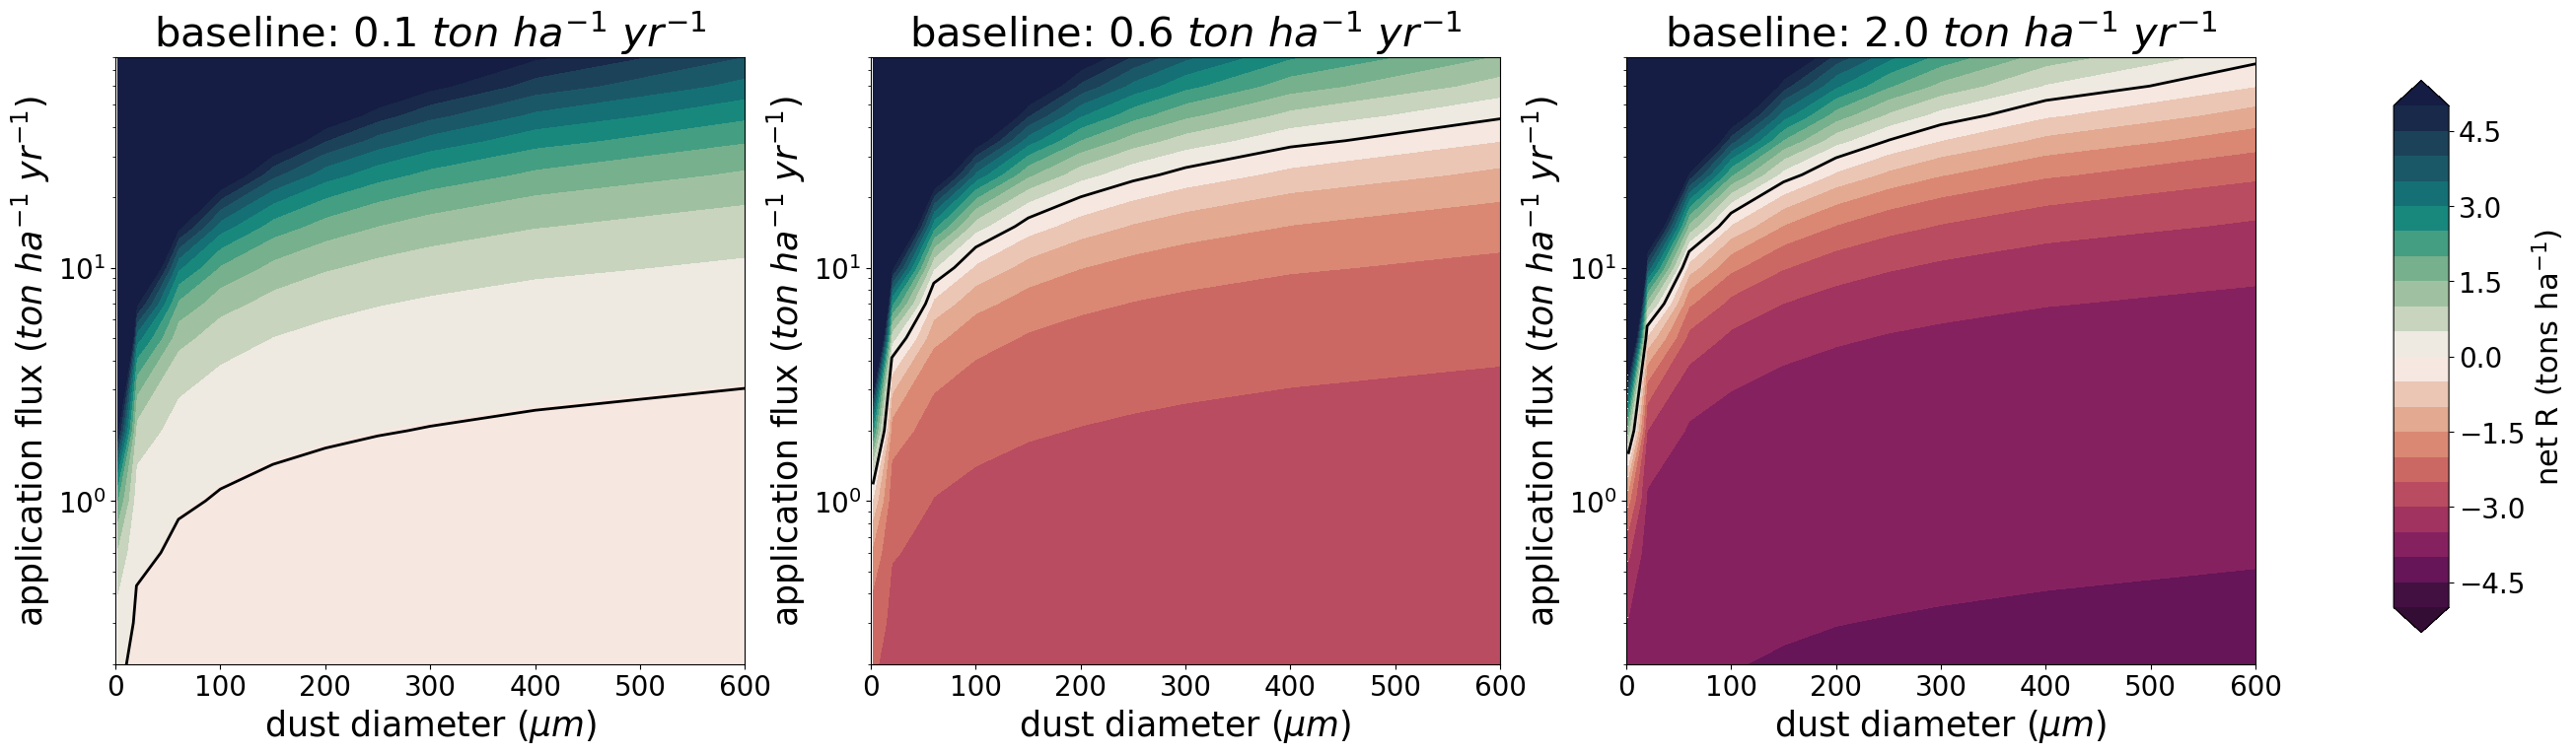

In [28]:
# --- PLOT --------------------
# set data conditions
feedstock = 'gbas'
cdr_var = 'cdr_dif' # 'co2pot_adv_tonHa_camg'  # 'co2pot_tot_tonHa_camg'
loss_percent = 0
cdr_calc = 'netR_noNeg'
logX = False
logY = True

# pull out the data we want
dsanom1_p4 = ds_anom1.sel(feedstock=feedstock, cdr_calc=cdr_calc).sel(loss_percent=loss_percent, method='nearest')[cdr_var]
dsanom2_p4 = ds_anom2.sel(feedstock=feedstock, cdr_calc=cdr_calc).sel(loss_percent=loss_percent, method='nearest')[cdr_var]
dsanom3_p4 = ds_anom3.sel(feedstock=feedstock, cdr_calc=cdr_calc).sel(loss_percent=loss_percent, method='nearest')[cdr_var]

# interpolate to fill nans (they're rare, 
# but present in a couple cases where a run didn't complete)
dsanom1_p4 = dsanom1_p4.interpolate_na(dim='dustrate_ton_ha_yr', method='linear').copy()
dsanom2_p4 = dsanom2_p4.interpolate_na(dim='dustrate_ton_ha_yr', method='linear').copy()
dsanom3_p4 = dsanom3_p4.interpolate_na(dim='dustrate_ton_ha_yr', method='linear').copy()

# *****************************
# --- plot aesthetics
# color palette
col = cmo.curl_r
# set fontsizes
fs_xlab = 25     # x title
fs_ylab = 25     # y title
fs_tick = 20     # ticks, bot haxes
fs_title = 30    # plot title (main)
fs_title_sub = 28 # plot title (individual panels)
fs_cbarlab = 22  # colorbar title
fs_cbartick = 20 # colorbar ticks
# color limits
cmin, cmax = -5, 5
cbar_extend = "both"    # both, max, or min
# axis limits
xmin, xmax = (2 if logX else 0), 600
ymin, ymax = (0.2 if logY else 0), 80 
# *****************************

# x and y arrays
# [fertlevel 1]
x1 = dsanom1_p4['dustrad'].values
y1 = dsanom1_p4['dustrate_ton_ha_yr'].values
# [fertlevel 2]
x2 = dsanom2_p4['dustrad'].values
y2 = dsanom2_p4['dustrate_ton_ha_yr'].values
# [fertlevel 3]
x3 = dsanom3_p4['dustrad'].values
y3 = dsanom3_p4['dustrate_ton_ha_yr'].values

# get the application rates for each case 
cf_apprate_1 = np.round(ds_anom1.cf_apprate.values, 1)
cf_apprate_2 = np.round(ds_anom2.cf_apprate.values, 1)
cf_apprate_3 = np.round(ds_anom3.cf_apprate.values, 1)



# --- SET UP PLOT
spec = GridSpec(ncols=3, nrows=1, wspace=0.2)
fig = plt.figure(figsize=(28,8))

# --- CASE 1
ax = plt.subplot(spec[0])
contour = plt.contourf(x1*2,y1,dsanom1_p4.transpose(), 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, vmin=cmin, vmax=cmax, extend=cbar_extend)
contour_line = plt.contour(x1*2,y1,dsanom1_p4.transpose(),levels=[-0.01], linestyles='solid', colors='black', linewidths=2)
plt.xlabel(r"dust diameter $(\mu m)$", fontsize=fs_xlab)
plt.ylabel(r"application flux $(ton\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.tick_params(axis='both', labelsize=fs_tick)
# plt.suptitle(f"netCDR basalt — aglime\ncf: {cf_apprate} {r'$ton\ ha^{-1}\ yr^{-1}$'}; {cf_dustrad*2} {r'$\mu m$'}", fontsize = fs_title)
# plt.title(f"\n{fertLevel_1} fertilizer use", fontsize=fs_title_sub)
plt.title(f"baseline: {cf_apprate_1} {r'$ton\ ha^{-1}\ yr^{-1}$'}", fontsize=fs_title)
(plt.xscale('log') if logX else "")
(plt.yscale('log') if logY else "")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# --- CASE 2
ax = plt.subplot(spec[1])
contour = plt.contourf(x2*2,y2,dsanom2_p4.transpose(), 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, vmin=cmin, vmax=cmax, extend=cbar_extend)
contour_line = plt.contour(x2*2,y2,dsanom2_p4.transpose(),levels=[-0.01], linestyles='solid', colors='black', linewidths=2)
plt.xlabel(r"dust diameter $(\mu m)$", fontsize=fs_xlab)
plt.ylabel(r"application flux $(ton\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.tick_params(axis='both', labelsize=fs_tick)
# plt.title(f"\n{fertLevel_2} fertilizer use", fontsize=fs_title_sub)
plt.title(f"baseline: {cf_apprate_2} {r'$ton\ ha^{-1}\ yr^{-1}$'}", fontsize=fs_title)
(plt.xscale('log') if logX else "")
(plt.yscale('log') if logY else "")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
# plt.yscale('log')

# --- CASE 3
ax = plt.subplot(spec[2])
contour = plt.contourf(x3*2,y3,dsanom3_p4.transpose(), 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, vmin=cmin, vmax=cmax, extend=cbar_extend)
contour_line = plt.contour(x3*2,y3,dsanom3_p4.transpose(),levels=[-0.01], linestyles='solid', colors='black', linewidths=2)
plt.xlabel(r"dust diameter $(\mu m)$", fontsize=fs_xlab)
plt.ylabel(r"application flux $(ton\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.tick_params(axis='both', labelsize=fs_tick)
# plt.title(f"\n{fertLevel_2} fertilizer use", fontsize=fs_title_sub)
plt.title(f"baseline: {cf_apprate_3} {r'$ton\ ha^{-1}\ yr^{-1}$'}", fontsize=fs_title)
(plt.xscale('log') if logX else "")
(plt.yscale('log') if logY else "")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar = plt.colorbar(contour, cax=cbar_ax)
cbar.set_label(r"$\text{net R}\ (\text{tons}\ \text{ha}^{-1})$", fontsize=fs_cbarlab)
cbar.ax.tick_params(labelsize=fs_cbartick)
# plt.yscale('log')


In [ ]:
# ------------